<a href="https://colab.research.google.com/github/henrynkoh/Bible-RightlyDividing-Study/blob/master/download_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import pandas_datareader as pdr

# 종목 타입에 따라 download url이 다름. 종목코드 뒤에 .KS .KQ등이 입력되어야해서 Download Link 구분 필요
stock_type = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt'
}

# 회사명으로 주식 종목 코드를 획득할 수 있도록 하는 함수
def get_code(df, name):
  code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
  
  # 위와같이 code명을 가져오면 앞에 공백이 붙어있는 상황이 발생하여 앞뒤로 sript() 하여 공백 제거
  code = code.strip()
  return code

# download url 조합
def get_download_stock(market_type=None):
  market_type_param = stock_type[market_type]
  download_link = 'http://kind.krx.co.kr/corpgeneral/corpList.do'
  download_link = download_link + '?method=download'
  download_link = download_link + '&marketType=' + market_type_param

  df = pd.read_html(download_link, header=0)[0]
  return df;

# kospi 종목코드 목록 다운로드
def get_download_kospi():
  df = get_download_stock('kospi')
  df.종목코드 = df.종목코드.map('{:06d}.KS'.format)
  return df

# kosdaq 종목코드 목록 다운로드
def get_download_kosdaq():
  df = get_download_stock('kosdaq')
  df.종목코드 = df.종목코드.map('{:06d}.KQ'.format)
  return df

In [9]:

# kospi, kosdaq 종목코드 각각 다운로드
kospi_df = get_download_kospi()
kosdaq_df = get_download_kosdaq()

# data frame merge
code_df = pd.concat([kospi_df, kosdaq_df])

# data frame정리
code_df = code_df[['회사명', '종목코드']]

# data frame title 변경 '회사명' = name, 종목코드 = 'code'
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})

code_df

,name,code
0,JS전선,005560.KS
1,거북선2호,101380.KS
2,거북선6호,114140.KS
3,교보메리츠,064900.KS
4,국제관광공사,028780.KS
...,...,...
2225,해성옵틱스,076610.KQ
2226,핸디소프트,220180.KQ
2227,행남사,008800.KQ
2228,홈센타홀딩스,060560.KQ


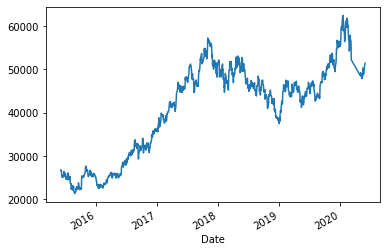

In [10]:
code = get_code(code_df, '삼성전자')

df = pdr.get_data_yahoo(code)

df['Close'].plot()

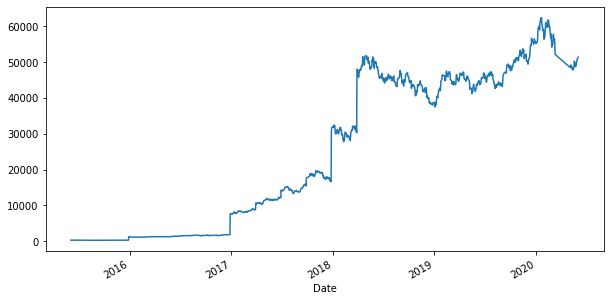

In [11]:
# 수정주가를 반영
df = pdr.get_data_yahoo(code, adjust_price=True)

df['Close'].plot(figsize=(10, 5))

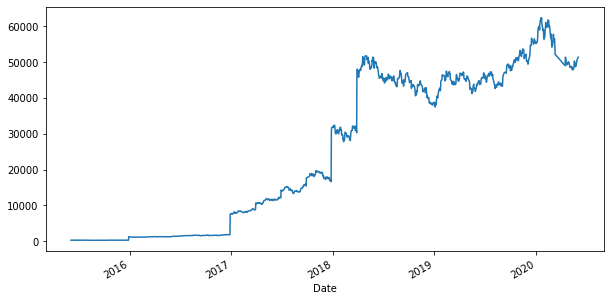

In [20]:
df = pdr.get_data_yahoo(code, adjust_price=True)

df['Close'].plot(figsize=(10, 5))

In [12]:
df

,High,Low,Open,Close,Volume,Adj_Ratio
Date,,,,,,
2015-06-04,260.091824,253.109493,255.049030,259.316010,19411950.0,0.009698
2015-06-05,262.807178,256.018801,256.988569,260.091827,9828150.0,0.009698
2015-06-08,261.255558,254.661134,260.867650,254.855087,10118950.0,0.009698
2015-06-09,254.079261,245.933209,252.139725,248.648560,13735250.0,0.009698
2015-06-10,250.976002,244.769485,248.648558,244.769485,12501700.0,0.009698
...,...,...,...,...,...,...
2020-05-27,50000.000000,48800.000000,48950.000000,49900.000000,19548479.0,1.000000
2020-05-28,51200.000000,49900.000000,51100.000000,50400.000000,31309318.0,1.000000
2020-05-29,50700.000000,49700.000000,50000.000000,50700.000000,27596961.0,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1188 entries, 2015-06-04 to 2020-06-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1188 non-null   float64
 1   Low        1188 non-null   float64
 2   Open       1188 non-null   float64
 3   Close      1188 non-null   float64
 4   Volume     1188 non-null   float64
 5   Adj_Ratio  1188 non-null   float64
dtypes: float64(6)
memory usage: 65.0 KB


In [14]:
df

,High,Low,Open,Close,Volume,Adj_Ratio
Date,,,,,,
2015-06-04,260.091824,253.109493,255.049030,259.316010,19411950.0,0.009698
2015-06-05,262.807178,256.018801,256.988569,260.091827,9828150.0,0.009698
2015-06-08,261.255558,254.661134,260.867650,254.855087,10118950.0,0.009698
2015-06-09,254.079261,245.933209,252.139725,248.648560,13735250.0,0.009698
2015-06-10,250.976002,244.769485,248.648558,244.769485,12501700.0,0.009698
...,...,...,...,...,...,...
2020-05-27,50000.000000,48800.000000,48950.000000,49900.000000,19548479.0,1.000000
2020-05-28,51200.000000,49900.000000,51100.000000,50400.000000,31309318.0,1.000000
2020-05-29,50700.000000,49700.000000,50000.000000,50700.000000,27596961.0,1.000000


df(info)

In [17]:
df(info)


NameError: ignored

In [18]:
df

,High,Low,Open,Close,Volume,Adj_Ratio
Date,,,,,,
2015-06-04,260.091824,253.109493,255.049030,259.316010,19411950.0,0.009698
2015-06-05,262.807178,256.018801,256.988569,260.091827,9828150.0,0.009698
2015-06-08,261.255558,254.661134,260.867650,254.855087,10118950.0,0.009698
2015-06-09,254.079261,245.933209,252.139725,248.648560,13735250.0,0.009698
2015-06-10,250.976002,244.769485,248.648558,244.769485,12501700.0,0.009698
...,...,...,...,...,...,...
2020-05-27,50000.000000,48800.000000,48950.000000,49900.000000,19548479.0,1.000000
2020-05-28,51200.000000,49900.000000,51100.000000,50400.000000,31309318.0,1.000000
2020-05-29,50700.000000,49700.000000,50000.000000,50700.000000,27596961.0,1.000000


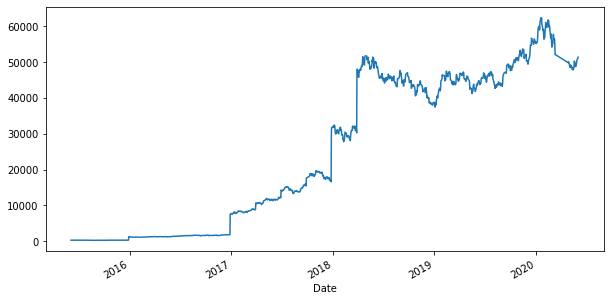

In [21]:
df = pdr.get_data_yahoo(code, adjust_price=True)

df['Close'].plot(figsize=(10, 5))

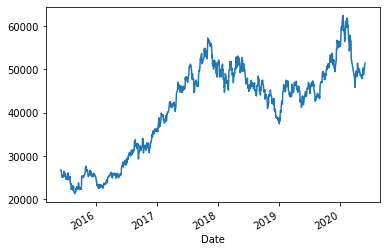

In [22]:
code = get_code(code_df, '삼성전자')

df = pdr.get_data_yahoo(code)

df['Close'].plot()

In [0]:
def get_download_stock(market_type=None):
  market_type_param = stock_type[market_type]
  download_link = 'http://kind.krx.co.kr/corpgeneral/corpList.do'
  download_link = download_link + '?method=download'
  download_link = download_link + '&marketType=' + market_type_param

  df = pd.read_html(download_link, header=0)[0]
  return df;

In [0]:
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [3]:
pip install tensorflow

In [0]:
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [0]:
dnn = keras.Sequential()
dnn.add(Dense(units=1, input_shape=(1,)))
dnn.compile(optimizer='sgd', loss='mse')

In [6]:
dnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
dnn.fit(x_new,y,epochs=10)

NameError: ignored

In [8]:
y_hat_dnn=predict(x_test)
y_hat_dnn

NameError: ignored

In [0]:
dnn = keras.Sequential()
dnn.add(Dense(units=1, input_shape=(1,)))
dnn.compile(optimizer='sgd', loss='mse')

In [11]:
import requests
from bs4 import BeautifulSoup

url = "https://ko.wikipedia.org/wiki/%ED%8F%89%ED%99%94%EC%9D%98_%EC%86%8C%EB%85%80%EC%83%81"
resp = requests.get(url)
html_src = resp.text

soup = BeautifulSoup(html_src, 'html.parser')
                    
photo_first = soup.find(name='img')
print(photo_first)
print("\n")

photo_sockcho = soup.find(name='img', attrs={'src':'//upload.wikimedia.org/wikipedia/commons/thumb/1/16/%ED%8F%89%ED%99%94%EC%9D%98%EC%86%8C%EB%85%80%EC%83%81%28Statute_of_Peace%29.jpg/220px-%ED%8F%89%ED%99%94%EC%9D%98%EC%86%8C%EB%85%80%EC%83%81%28Statute_of_Peace%29.jpg'})
print(photo_sockcho)

<img alt="" class="thumbimage" data-file-height="3000" data-file-width="4000" decoding="async" height="173" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/36/Japanese_Embassy_in_Seoul_and_watched_from_behind_a_bronze_statue_of_comfort_women.JPG/230px-Japanese_Embassy_in_Seoul_and_watched_from_behind_a_bronze_statue_of_comfort_women.JPG" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/36/Japanese_Embassy_in_Seoul_and_watched_from_behind_a_bronze_statue_of_comfort_women.JPG/345px-Japanese_Embassy_in_Seoul_and_watched_from_behind_a_bronze_statue_of_comfort_women.JPG 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/36/Japanese_Embassy_in_Seoul_and_watched_from_behind_a_bronze_statue_of_comfort_women.JPG/460px-Japanese_Embassy_in_Seoul_and_watched_from_behind_a_bronze_statue_of_comfort_women.JPG 2x" width="230"/>


<img alt="" class="thumbimage" data-file-height="2268" data-file-width="4032" decoding="async" height="124" src="//upload.wikimedia.org/wikipedia/commons/th

In [12]:

<Response [200]>
 

 

<!DOCTYPE html>

<html class="client-nojs" lang="en" dir="ltr">

<head>

<meta charset="UTF-8"/>

<title>Wikipedia, the free encyclopedia</title>

<script>document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace

SyntaxError: ignored

In [13]:
soup = BeautifulSoup(html, 'html.parser')
print(type(soup))
print("\n")                 
print(soup.head)
print("\n")
print(soup.body)
print("\n")

NameError: ignored

In [14]:
<class 'bs4.BeautifulSoup'>
 

 

<head>

<meta charset="utf-8"/>

<title>Wikipedia, the free encyclopedia</title>

<script>document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgC ... <중략>...

 

 

<body class="mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject page-Main_Page rootpage-Main_Page skin-vector action-view">

<div class="noprint" id="mw-page-base"></div>

<div class="noprint" id="mw-head-base"></div>

<div class="mw-body" id="content" role="main">

<a id="top"></a>

<div class="mw-body-content" id="siteNotice"><!-- CentralNotice --></div>

<div class="mw-indicators mw-body-content">

</div>  

<h1 class="firstHeading" id="firstHeading" lang="en">Main Page</h1>

<div class="mw-body-content" id="bodyContent">

<div class="noprint" id="siteSub">From Wikipedia, the free encyclopedia</div>

<div id="contentSub"></div>

<div id="jump-to-nav"></div>  ... <이하 생략>...

SyntaxError: ignored

In [15]:
print(soup.title)
print(soup.title.name)
print(soup.title.string)

<title>평화의 소녀상 - 위키백과, 우리 모두의 백과사전</title>
title
평화의 소녀상 - 위키백과, 우리 모두의 백과사전


In [16]:

<title>Wikipedia, the free encyclopedia</title>
title

Wikipedia, the free encyclopedia

SyntaxError: ignored

In [17]:
import requests

url = "https://www.wikipedia.org/"
resp = requests.get(url)

html = resp.text
print(html[:1000])

<!DOCTYPE html>
<html lang="mul" class="no-js">
<head>
<meta charset="utf-8">
<title>Wikipedia</title>
<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">
<script>
document.documentElement.className = document.documentElement.className.replace( /(^|\s)no-js(\s|$)/, "$1js-enabled$2" );
</script>
<meta name="viewport" content="initial-scale=1,user-scalable=yes">
<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">
<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">
<link rel="license" href="//creativecommons.org/licenses/by-sa/3.0/">
<style>
.sprite{background-image:url(portal/wikipedia.org/assets/img/sprite-81a290a5.png);background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-81a290a5.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_sister{background-posit

In [0]:
import pandas as pd

 

#html 객체의 표(table)를 pandas dataframe으로 가져온다
url = 'http://media.kisline.com/highlight/mainHighlight.nice?nav=1&paper_stock=005930'
tables = pd.read_html(url)

In [0]:
import pandas as pd
url = 'http://media.kisline.com/highlight/mainHighlight.nice?nav=1&paper_stock=005930'
tables = pd.read_html(url)

In [20]:
#엑셀로 저장하기
df = tables[4]    #개별IFRS 연간 재무제표
df.to_excel('output.xlsx')

IndexError: ignored

In [21]:

df = tables[4]    
df.to_excel('output.xlsx')

IndexError: ignored

In [0]:
from selenium import webdriver from bs4 import BeautifulSoup import time

출처: https://comdoc.tistory.com/entry/6-selenium-과-BeautifulSoup으로-daum-카페를-크롤링-해보자?category=798707 [ComDoc]

In [22]:
from selenium import webdriver from bs4 import BeautifulSoup import time

SyntaxError: ignored

In [23]:
driver = webdriver.Chrome('./driver/chromedriver')


NameError: ignored

In [24]:
driver.get('https://logins.daum.net/accounts/loginform.do?mobilefull=1&category=cafe&url=http%3A%2F%2Fm.cafe.daum.net%2F_myCafe%3Fnull')


NameError: ignored

In [25]:
time.sleep(3) 

NameError: ignored

In [26]:
driver.find_element_by_xpath("""//*[@id="id"]""").send_keys('') # id driver.find_element_by_xpath("""//*[@id="inputPwd"]""").send_keys('') # 패스워드 driver.find_element_by_xpath("""//*[@id="loginBtn"]""").click() # 입력 버튼 클릭. time.sleep(3)


NameError: ignored

In [1]:
while page < 102 : # 게시글 페이지 수 입니다. 올해글이 약 102page를 차지하고 있었습니다. page = page + 1 quest_urls = [] try : # add personal conditions # &search.menuid = : 게시판 번호(카페마다 상이) # &search.page = : 데이터 수집 할 페이지 번호 # &userDisplay = 50 : 한 페이지에 보여질 게시글 수 driver.get(base_url + '&search.menuid=2&search.page='+ str(page) +'&userDisplay=50') driver.switch_to.frame('cafe_main') #iframe으로 프레임 전환 quest_list = driver.find_elements_by_css_selector('div.inner_list > a.article') quest_urls = [ i.get_attribute('href') for i in quest_list ] print(len(quest_urls)) for quest in quest_urls : try : #게시글이 삭제되었을 경우가 있기 때문에 try-exception driver.get(quest) driver.switch_to.frame('cafe_main') soup = bs(driver.page_source, 'html.parser') #제목 추출 title = soup.select('div.tit-box span.b')[0].get_text() print(title) #내용 추출 content_tags = soup.select('#tbody')[0].select('p') content = ' '.join([ tags.get_text() for tags in content_tags ]) print(content) job_seq = job_seq+1 sqlInsert = "INSERT INTO schema_name.table_name VALUES (%s,%s,%s)" val = (job_seq,title,content) curs.execute(sqlInsert,val) conn.commit() #말머리 추출 try : tag = soup.select('div.tit-box span.head')[0].get_text() temp_list = [title, content] f = open('preg_quest.csv', 'a+', encoding = 'ansi', newline='') wr = csv.writer(f) wr.writerow(temp_list) f.close() cnt = cnt + 1 except : # 말머리 없으면 next pass except : # chrome alert창 처리해줌 driver.switch_to_alert.accpet() driver.switch_to_alert driver.switch_to_alert.accpet() except : pass print([page, cnt]) #page로는 진행상황을 알 수 있고 cnt로는 몇개의 데이터를 모았는지 알 수 있음 conn.close()


SyntaxError: ignored

In [0]:
import urllib.request
import urllib.parse
from bs4 import BeautifulSoup

baseurl = 'https://search.naver.com/search.naver?where=webkr&sm=tab_jum&query=python+%EB%84%A4%EC%9D%B4%EB%B2%84+%EA%B2%8C%EC%8B%9C%ED%8C%90+%ED%81%AC%EB%A1%A4%EB%A7%81'
plusurl = input('python 네이버 게시판 크롤링:')
url = baseurl + urllib.parse.quote_plus(plusurl)

html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html, 'html.parser')

title = soup.find_all(class_= 'sh_blog_title')

for i in title:
    print(i.attrs['title'])
    print(i.attrs['href'])
    print()

In [0]:
import urllib.request
import urllib.parse
from bs4 import BeautifulSoup

baseurl = 'https://search.naver.com/search.naver?where=post&sm=tab_jum&query='
plusurl = input('python 네이버 게시판 크롤링:')
url = baseurl + urllib.parse.quote_plus(plusurl)

html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html, 'html.parser')

title = soup.find_all(class_= 'sh_blog_title')

for i in title:
    print(i.attrs['title'])
    print(i.attrs['href'])
    print()

In [2]:
import requests

url = "https://www.wikipedia.org/"
resp = requests.get(url)

html = resp.text
print(html)

<!DOCTYPE html>
<html lang="mul" class="no-js">
<head>
<meta charset="utf-8">
<title>Wikipedia</title>
<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">
<script>
document.documentElement.className = document.documentElement.className.replace( /(^|\s)no-js(\s|$)/, "$1js-enabled$2" );
</script>
<meta name="viewport" content="initial-scale=1,user-scalable=yes">
<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">
<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">
<link rel="license" href="//creativecommons.org/licenses/by-sa/3.0/">
<style>
.sprite{background-image:url(portal/wikipedia.org/assets/img/sprite-81a290a5.png);background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-81a290a5.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_sister{background-posit

In [8]:
import requests

url = "https://www.fgtv.com/"
resp = requests.get(url)

html = resp.text
print(html[:500])


<!DOCTYPE html>
<html>
<head>
	<title>여의도순복음교회</title>
	<link rel="stylesheet" type="text/css" href="/css/style.css?1" />
	<link href="https://file.fgtv.com/images/favicon.ico" rel="shortcut icon"/>
	<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />

	<script type="text/javascript" src="/include_intro/intro_vodctl.js"></script>

	<!--레이어팝업
	<script language="JavaScript" src="https://www.fgtv.com/common_fyn_js/m_layer.js"></script> 
	<script language="JavaScript"


In [1]:
from selenium import webdriver
import time

# 100대 통계지표 엑셀 다운로드
def download_bok_statistics():

    driver = webdriver.Chrome("./Selenium/chromedriver")
    driver.implicitly_wait(3)
    driver.get("http://ecos.bok.or.kr/jsp/vis/keystat/#/key")

ModuleNotFoundError: ignored

In [2]:
pip install selenium

     |████████████████████████████████| 911kB 3.5MB/s 


In [0]:
from selenium import webdriver
import time

# 100대 통계지표 엑셀 다운로드
def download_bok_statistics():

    driver = webdriver.Chrome("./Selenium/chromedriver")
    driver.implicitly_wait(3)
    driver.get("http://ecos.bok.or.kr/jsp/vis/keystat/#/key")